In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

data = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')

In [2]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data)

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

In [3]:
def params_init(n_inputs, n_outputs):
    w = np.random.rand(n_inputs, n_outputs) * np.sqrt(1 / n_outputs)
    b = np.zeros((n_inputs, 1))
    return w, b

def reLU(x):
    return np.maximum(x,0)

def l_reLU(x, alpha = 0.01):
    return np.maximum(x, alpha*x)

def reLU_der(x):
    return x > 0

def l_reLU_der(x, alpha = 0.01):
    dx = np.ones_like(x)
    dx[x < 0] = alpha
    return dx

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_der(x):
    return np.exp(-x) / (1 + np.exp(-x))**2

def tanh(x):
    return np.tanh(x)

def tanh_der(x):
    return 1 - np.tanh(x)**2

def softmax(x):
    result = np.exp(x) / sum(np.exp(x))
    return result


def softmax_der(backward_in, forward_out):

    # Ensure that everything is in the right shape
    softmax = np.reshape(forward_out, (1, -1))
    grad = np.reshape(backward_in, (1, -1))

    d_softmax = (
        softmax * np.identity(softmax.size)
        - softmax.transpose() @ softmax)
    backward_out = (grad @ d_softmax).ravel()
    return backward_out



def update_params(w, b, dw, db, lr=1e-3):
    w_new = w - lr*dw
    b_new = b - lr*db
    return w_new, b_new


def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

In [4]:
def forw_prop(w1, b1, w2, b2, X, activation):
    Z1 = w1.dot(X) + b1
    A1 = activation(Z1)
    Z2 = w2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2


def back_prop(Z1, A1, Z2, A2, w1, w2, X, Y, act_deriv):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = w2.T.dot(dZ2) * act_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2



In [5]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, lr, iterations):
    W1, b1 = params_init(30, 784)
    W2, b2 = params_init(10,30)
    for i in range(iterations):
        Z1, A1, Z2, A2 = forw_prop(W1, b1, W2, b2, X, l_reLU)
        dW1, db1, dW2, db2 = back_prop(Z1, A1, Z2, A2, W1, W2, X, Y, l_reLU_der)
        W1, b1 = update_params(W1, b1, dW1, db1, lr)
        W2, b2 = update_params(W2, b2, dW2, db2, lr)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [6]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.1, 500)

Iteration:  0
[2 2 2 ... 2 2 2] [7 1 1 ... 5 9 4]
0.09919512195121952
Iteration:  10
[8 2 0 ... 3 0 3] [7 1 1 ... 5 9 4]
0.1536341463414634
Iteration:  20
[7 1 3 ... 3 8 9] [7 1 1 ... 5 9 4]
0.5020731707317073
Iteration:  30
[7 1 1 ... 3 4 9] [7 1 1 ... 5 9 4]
0.6723170731707317
Iteration:  40
[7 1 1 ... 3 4 9] [7 1 1 ... 5 9 4]
0.7085121951219512
Iteration:  50
[7 1 1 ... 3 4 9] [7 1 1 ... 5 9 4]
0.7368780487804878
Iteration:  60
[7 1 1 ... 3 4 9] [7 1 1 ... 5 9 4]
0.7651707317073171
Iteration:  70
[7 1 1 ... 3 4 9] [7 1 1 ... 5 9 4]
0.7897073170731708
Iteration:  80
[7 1 1 ... 3 4 9] [7 1 1 ... 5 9 4]
0.8079756097560976
Iteration:  90
[7 1 1 ... 3 4 9] [7 1 1 ... 5 9 4]
0.8232195121951219
Iteration:  100
[7 1 1 ... 3 4 9] [7 1 1 ... 5 9 4]
0.8341951219512195
Iteration:  110
[7 1 1 ... 3 4 9] [7 1 1 ... 5 9 4]
0.843
Iteration:  120
[7 1 1 ... 3 4 9] [7 1 1 ... 5 9 4]
0.8496341463414634
Iteration:  130
[7 1 1 ... 3 4 9] [7 1 1 ... 5 9 4]
0.8559512195121951
Iteration:  140
[7 1 1 ... 3 

In [7]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forw_prop(W1, b1, W2, b2, X, l_reLU)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [7]
Label:  7


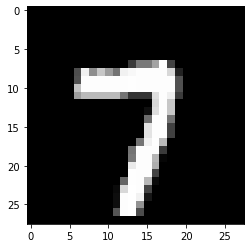

Prediction:  [1]
Label:  1


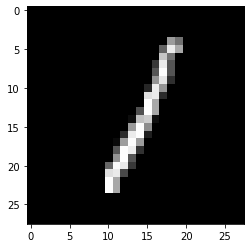

Prediction:  [1]
Label:  1


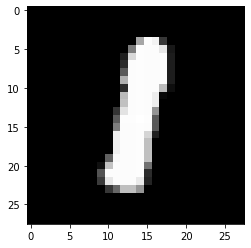

Prediction:  [1]
Label:  1


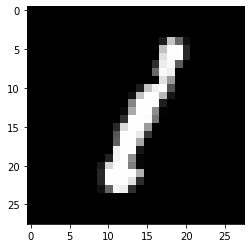

In [8]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)

In [10]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)

[7 3 3 6 4 7 9 3 5 0 0 1 7 5 3 3 1 6 9 9 2 2 7 0 8 9 7 3 4 8 0 7 8 3 6 4 6
 9 6 6 6 2 5 2 3 3 5 8 3 4 1 1 4 0 5 1 1 2 4 7 0 2 2 7 5 0 4 3 6 1 1 8 8 7
 0 9 8 5 1 1 7 8 0 5 9 5 1 9 5 7 6 5 0 0 0 9 6 4 3 0 9 1 8 8 6 0 2 5 0 1 5
 4 7 6 1 7 5 9 9 0 3 2 8 6 4 1 7 9 5 6 0 2 2 4 2 4 1 4 7 0 2 3 3 5 8 8 1 4
 2 2 7 3 2 7 8 5 6 1 8 1 2 4 0 2 0 8 8 8 8 9 7 9 2 6 1 1 3 8 9 0 1 7 8 4 1
 5 9 9 2 8 2 2 2 4 9 8 8 7 0 2 2 1 3 0 5 9 3 6 9 8 9 5 5 9 8 7 6 4 3 2 0 2
 3 7 3 1 3 3 7 2 1 0 5 9 9 5 2 9 7 4 4 9 8 9 2 7 2 4 1 6 5 1 5 1 8 3 1 7 6
 3 8 2 8 3 9 5 1 8 4 0 0 0 1 9 1 2 4 2 0 4 4 1 2 8 5 5 6 1 4 4 2 6 6 2 1 9
 0 7 5 0 1 4 4 1 9 6 4 0 5 2 8 9 4 4 3 8 8 9 8 0 1 5 5 8 5 4 4 5 4 9 1 6 9
 1 6 8 7 4 1 8 1 9 9 6 0 1 4 8 4 5 1 9 4 0 5 9 2 4 5 0 5 6 9 2 6 7 8 5 0 1
 8 5 8 3 6 9 7 9 9 3 5 9 7 9 2 3 2 0 3 9 1 2 9 2 1 6 2 6 1 6 0 6 3 0 6 1 1
 2 0 6 7 8 1 8 0 0 6 5 5 1 8 5 5 3 3 8 0 3 8 9 7 7 8 2 8 4 9 8 7 9 4 4 2 0
 8 0 9 3 0 5 9 0 9 8 8 5 4 3 8 7 6 8 6 9 3 0 6 8 1 1 6 3 2 7 4 3 2 3 3 4 8
 0 8 6 9 2 1 8 3 8 4 1 7 

0.909